---
layout: post
title:  "5 Most Popular Languages on AO3: Trend"
date:   2021-05-12
categories: data_cleaning visualization
tags: Python Pandas matplotlib datetime
---

In this section, we'll work with the date and language columns in the data set, and briefly touch base with the datetime object in Pandas.

* Table of Contents
{:toc}

# Loading File

In [1]:
# Load Python library
import pandas as pd

# Load file
path="/home/pi/Downloads/works-20210226.csv"
chunker = pd.read_csv(path, chunksize=10000)
works = pd.concat(chunker, ignore_index=True)

In [5]:
# Select two columns that we're interested in
lang_date = works[['creation date','language']].copy()

# Drop NA values
lang_date = lang_date.dropna()

# Preview of the DataFrame
lang_date

,creation date,language
0,2021-02-26,en
1,2021-02-26,en
2,2021-02-26,en
3,2021-02-26,en
4,2021-02-26,en
...,...,...
7269688,2008-09-13,en
7269689,2008-09-13,en
7269690,2008-09-13,en
7269691,2008-09-13,en


# Datetime in Pandas

Now we want to do some data manipulation. Fistly, we want to find the number of works posted in each language every month from the year of 2008 to 2021. To do this, we are going to group the DataFrame by month and by language. 

In [8]:
# Make sure the date column is in datetime format
lang_date['creation date'] = pd.to_datetime(lang_date['creation date']) 

In [13]:
# Group the date column by "month" (freq="1M")
# Pd.Grouper(key, freq) is used instead of pd.Series.dt.year
# because it does not aggregate month over multiple years
# Group the language column by counting each language

lang_count = lang_date.groupby([pd.Grouper(key='creation date',freq='1M'),'language']).size().reset_index()
lang_count.columns = ['date','language','count']
lang_count

,date,language,count
0,2008-09-30,en,928
1,2008-10-31,de,1
2,2008-10-31,en,480
3,2008-11-30,en,337
4,2008-12-31,en,239
...,...,...,...
3423,2021-02-28,uk,28
3424,2021-02-28,vi,131
3425,2021-02-28,wuu,16
3426,2021-02-28,yue,41


# Reshaping Dataframe with Pivot_table()

Continue with data manipulation. Here we're only interested in the trend of 5 most popular languages on AO3. From previous post, the 5 languages are 'en','zh','ru','es', and 'fr'. 

To make our selection process easier and to pave the road for visualization, we use ```pivot_table()``` in Pandas to reshape the DataFrame, using date as the index, and the languages as columns. 

Let me show you how the new DataFrame looks like.

In [16]:
# Use pivot_table() for easy visualization
# 5 most popular languages as subset
# The list of language is obtained from previous analysis

subset = lang_count.pivot_table(index='date',columns='language',values='count')[['en','zh','ru','es','fr']]
subset

language,en,zh,ru,es,fr
date,,,,,
2008-09-30,928.0,NaN,NaN,NaN,NaN
2008-10-31,480.0,NaN,NaN,NaN,NaN
2008-11-30,337.0,NaN,NaN,NaN,NaN
2008-12-31,239.0,NaN,NaN,NaN,NaN
2009-01-31,499.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2020-10-31,141120.0,6359.0,2092.0,2116.0,673.0
2020-11-30,122796.0,5201.0,1591.0,1791.0,770.0
2020-12-31,154417.0,5724.0,1576.0,1860.0,739.0


# Plotting The Trend in Language

Having prepared our data, we can now move on to visualization.

In [17]:
# Import libraries
# Top line is Jupyter Notebook specific

%matplotlib inline

import matplotlib.pyplot as plt

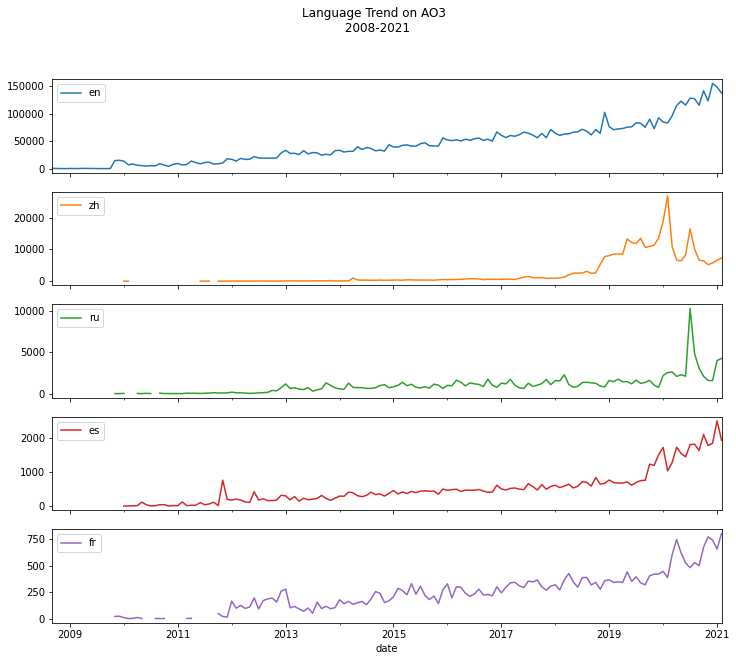

In [32]:
# Plotting the graph with Pandas
# The .plot() method is a simple wrapper around plt.plot()
# Use figsize to control the size of the graph

ax = subset.plot(subplots=True,figsize=(12,10),grid=False,title="Language Trend on AO3 \n 2008-2021")

Note that the graph displays monthly posting in each language from 2008 to 2021. You can see from the graph when users started to post in particular language, and when the interest in that language peaked throughout the years.